# QCoDeS Example with AMI430 ramps

In [79]:
import time

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Label, Text, HBox, VBox
from IPython.display import display

from qcodes.instrument_drivers.american_magnetics.AMI430 import AMI430, AMI430_3D
from qcodes.math_utils.field_vector import FieldVector
import qcodes.logger as logger
from qcodes.instrument.specialized_parameters import ElapsedTimeParameter

In [23]:
%matplotlib notebook

In [2]:
# Check if we can establish communication with the power sources
ix = AMI430("x", address="192.168.4.74", port=7180)
iy = AMI430("y", address="192.168.4.73", port=7180)
iz = AMI430("z", address="192.168.4.72", port=7180)

Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-17-090, firmware:2.62) in 1.10s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-17-095, firmware:2.62) in 0.97s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-17-087, firmware:2.62) in 0.98s


In [3]:
# Lets test the 3D driver now. 
field_limit = [  # If any of the field limit functions are satisfied we are in the safe zone.
#     lambda x, y, z: x == 0 and y == 0 and z < 3,  # We can have higher field along the z-axis if x and y are zero.
    lambda x, y, z: np.linalg.norm([x, y, z]) < 2
]

i3d = AMI430_3D(
    "AMI430-3D", 
    ix,
    iy,
    iz,
    field_limit=field_limit
)

In [4]:
i3d.block_during_ramp(False)

In [105]:
for axis in (ix, iy, iz):
    print(axis.full_name)
    for param in (
            axis.field_units,
            axis.field,
            axis.field_limit,
            axis.ramp_rate_units,
            axis.ramp_rate,
            axis.field_ramp_limit,
            axis.ramping_state,
    ):
        value = param.get()
        value_repr = f"{value:<9}" if isinstance(value, str) else f"{value:<+9.6f}"
        print(f"{param.name:<18} - {value_repr} {param.unit}")

print(i3d.full_name)
for param in (
        i3d.block_during_ramp,
        i3d.ramp_mode,
        i3d.cartesian_measured,
):
    value = param.get()
    if isinstance(value, str):
        value_repr = f"{value:<9}"
    elif isinstance(value, bool):
        value_repr = repr(value)
    elif isinstance(value, (list, tuple)):
        value_repr = FieldVector(**dict(zip(("x", "y", "z"), value))).repr_cartesian()
    else:
        value_repr = f"{value:<+9.6f}"
    print(f"{param.name:<18} - {value_repr} {param.unit}")

x
field_units        - tesla     
field              - +0.019999 T
field_limit        - +1.010000 T
ramp_rate_units    - minutes   
ramp_rate          - +0.033338 T/min
field_ramp_limit   - +0.052740 T/min
ramping_state      - holding   
y
field_units        - tesla     
field              - +0.014996 T
field_limit        - +1.009993 T
ramp_rate_units    - minutes   
ramp_rate          - +0.024997 T/min
field_ramp_limit   - +0.052920 T/min
ramping_state      - holding   
z
field_units        - tesla     
field              - +0.010019 T
field_limit        - +6.010001 T
ramp_rate_units    - minutes   
ramp_rate          - +0.016720 T/min
field_ramp_limit   - +0.298440 T/min
ramping_state      - holding   
AMI430-3D
block_during_ramp  - False 
ramp_mode          - linear    
cartesian_measured - FieldVector(x=0.01999586, y=0.015000899, z=0.010028783) T


In [6]:
console_handler = logger.get_console_handler()
console_handler

<StreamHandler stderr (WARNING)>

In [165]:
console_handler.setLevel("WARNING")
console_handler

<StreamHandler stderr (WARNING)>

In [162]:
console_handler.setLevel("DEBUG")
console_handler

<StreamHandler stderr (DEBUG)>

In [7]:
do_filter = logger.filter_instrument((ix, iy, iz, i3d), level="DEBUG")
do_filter

In [8]:
do_filter.__enter__()

In [160]:
do_filter.__exit__(None, None, None)

False

In [164]:
iz.field()

2021-07-30 16:48:16,874 ¦ qcodes.instrument.ip ¦ DEBUG ¦ ip ¦ _send ¦ 159 ¦ Writing FIELD:MAG?
 to instrument z
2021-07-30 16:48:16,877 ¦ qcodes.instrument.ip ¦ DEBUG ¦ ip ¦ _recv ¦ 166 ¦ Got b'0.000030892\r\n' from instrument z


3.0892e-05

In [9]:
time_p = ElapsedTimeParameter("time")
time_p.reset_clock()
time_p

<qcodes.instrument.specialized_parameters.ElapsedTimeParameter: time at 2440469093448>

In [10]:
zero_field = FieldVector(x=0., y=0., z=0.)
zero_field

FieldVector(x=0.0, y=0.0, z=0.0)

In [11]:
setp = FieldVector(x=0.02, y=0.02, z=0.02)
setp

FieldVector(x=0.02, y=0.02, z=0.02)

In [134]:
ts = []
xs = []
ys = []
zs = []

In [132]:
for _ in range(5):
    ts.append(time_p())
    xs.append(ix.field())
    ys.append(iy.field())
    zs.append(iz.field())

    time.sleep(0.05)

<IPython.core.display.Javascript object>


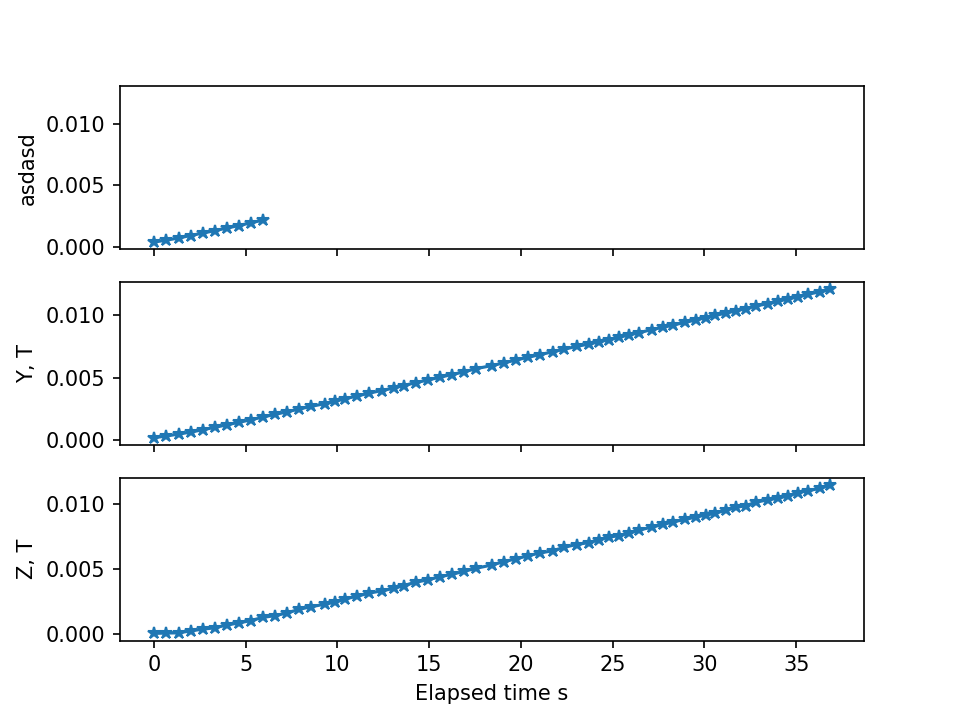

In [26]:
fig, axs = plt.subplots(3, 1, sharex=True)
axs[-1].set_xlabel(f"{time_p.label} {time_p.unit}")
axs[0].set_ylabel("X, T")
axs[1].set_ylabel("Y, T")
axs[2].set_ylabel("Z, T")

lines = [a.plot(ts, data, "*-")[0] for a, data in zip(axs, (xs, ys, zs))]

In [85]:
ts = []
xs = []
ys = []
zs = []

In [86]:
setp = FieldVector(x=0.020, y=0.015, z=0.010)
setp

FieldVector(x=0.02, y=0.015, z=0.01)

<IPython.core.display.Javascript object>


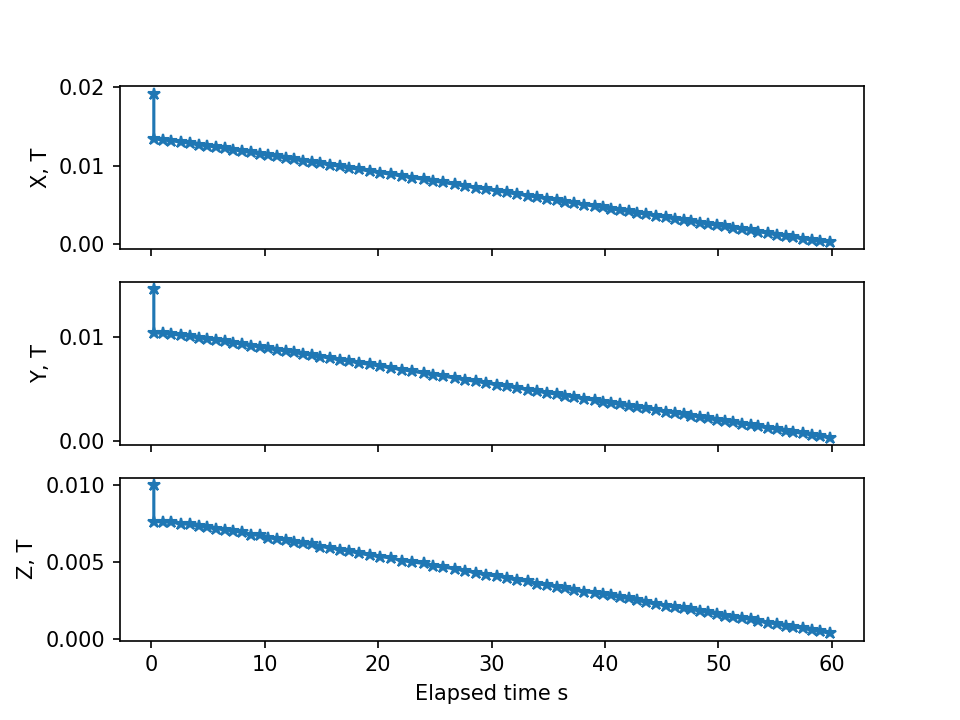

In [84]:
fig, axs = plt.subplots(3, 1, sharex=True)
axs[-1].set_xlabel(f"{time_p.label} {time_p.unit}")
axs[0].set_ylabel("X, T")
axs[1].set_ylabel("Y, T")
axs[2].set_ylabel("Z, T")
axs[0].autoscale(True, tight=False)
axs[1].autoscale(True, tight=False)
axs[2].autoscale(True, tight=False)
lines = [a.plot(ts, data, "*-")[0] for a, data in zip(axs, (xs, ys, zs))]

In [80]:
tx = Text()
ty = Text()
tz = Text()

w = VBox([
    HBox([
        Label("X"),
        tx,
    ]),
    HBox([
        Label("Y"),
        ty,
    ]),
    HBox([
        Label("Z"),
        tz,
    ]),
])

In [99]:
def measure():
    ts.append(time_p())
    xs.append(ix.field())
    ys.append(iy.field())
    zs.append(iz.field())

    tx.value = str(xs[-1])
    ty.value = str(ys[-1])
    tz.value = str(zs[-1])

    time.sleep(0.5)

In [100]:
setp = FieldVector(x=0.020, y=0.015, z=0.010)
setp

FieldVector(x=0.02, y=0.015, z=0.01)

In [106]:
ts = []
xs = []
ys = []
zs = []

In [107]:
wd = display(w)

time_p.reset_clock()

for _ in range(20):
    measure()

i3d.ramp_linearly(setpoint=zero_field, time=0.6)

while all(
        axis_instrument.ramping_state() == "ramping" for axis_instrument in (ix, iy, iz)
):
    measure()

for _ in range(30):
    measure()
    

2021-07-30 17:54:57,376 ¦ qcodes.instrument.base ¦ DEBUG ¦ AMI430 ¦ ramp_linearly ¦ 760 ¦ [AMI430-3D(AMI430_3D)] Linear ramp: setpoint FieldVector(x=0.0, y=0.0, z=0.0) T in 0.6 minutes
2021-07-30 17:54:57,591 ¦ qcodes.instrument.base ¦ DEBUG ¦ AMI430 ¦ ramp_linearly ¦ 767 ¦ [AMI430-3D(AMI430_3D)] Linear ramp: start FieldVector(x=0.020001527, y=0.01499429, z=0.010010092)
2021-07-30 17:54:57,592 ¦ qcodes.instrument.base ¦ DEBUG ¦ AMI430 ¦ ramp_linearly ¦ 770 ¦ [AMI430-3D(AMI430_3D)] Linear ramp: delta FieldVector(x=-0.020001527, y=-0.01499429, z=-0.010010092)
2021-07-30 17:54:57,593 ¦ qcodes.instrument.base ¦ DEBUG ¦ AMI430 ¦ ramp_linearly ¦ 780 ¦ [AMI430-3D(AMI430_3D)] Linear ramp: new rate for x is 0.03333587833333334 T/min
2021-07-30 17:54:57,594 ¦ qcodes.instrument.base ¦ DEBUG ¦ AMI430 ¦ ramp_linearly ¦ 780 ¦ [AMI430-3D(AMI430_3D)] Linear ramp: new rate for y is 0.024990483333333334 T/min
2021-07-30 17:54:57,595 ¦ qcodes.instrument.base ¦ DEBUG ¦ AMI430 ¦ ramp_linearly ¦ 780 ¦ [AMI4

In [82]:
ix.pause()
iy.pause()
iz.pause()

<IPython.core.display.Javascript object>


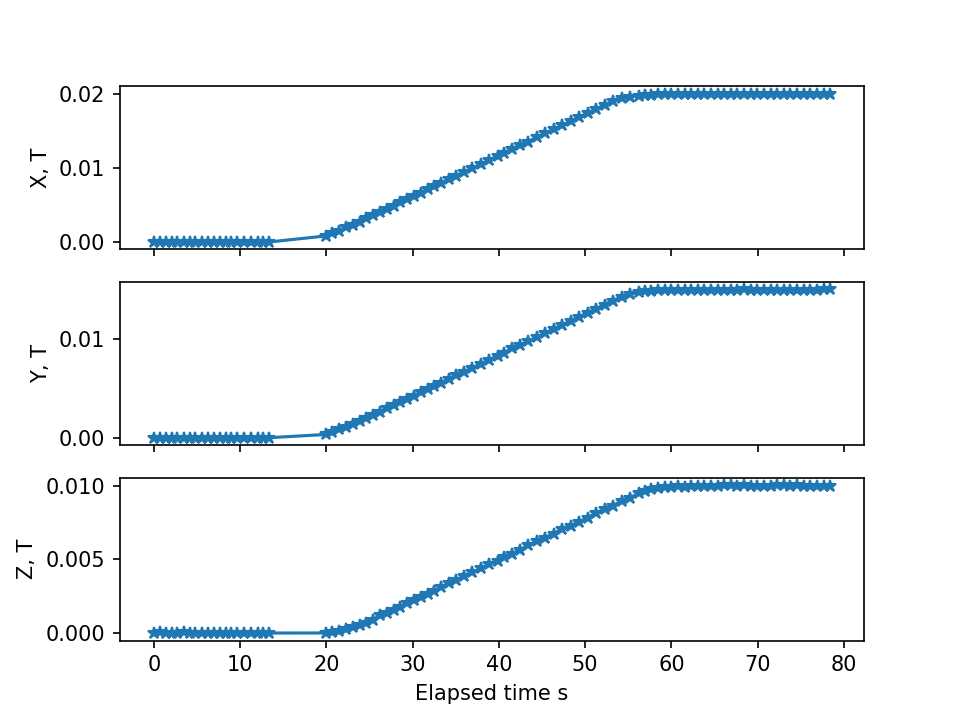

In [104]:
fig, axs = plt.subplots(3, 1, sharex=True)
axs[-1].set_xlabel(f"{time_p.label} {time_p.unit}")
axs[0].set_ylabel("X, T")
axs[1].set_ylabel("Y, T")
axs[2].set_ylabel("Z, T")
axs[0].autoscale(True, tight=False)
axs[1].autoscale(True, tight=False)
axs[2].autoscale(True, tight=False)
lines = [a.plot(ts, data, "*-")[0] for a, data in zip(axs, (xs, ys, zs))]

<IPython.core.display.Javascript object>


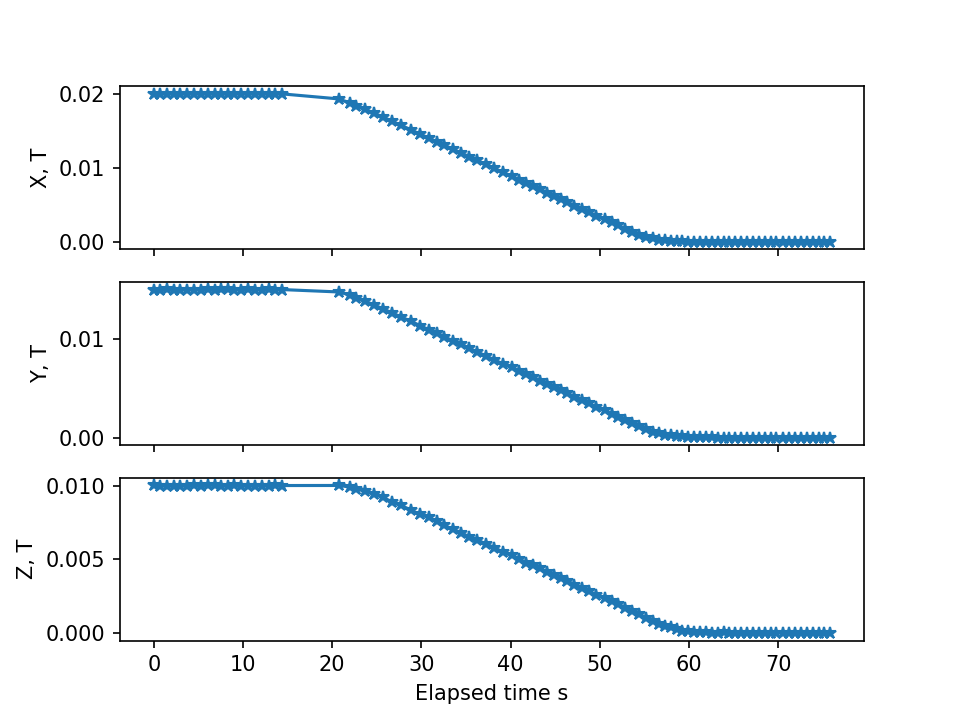

In [108]:
fig, axs = plt.subplots(3, 1, sharex=True)
axs[-1].set_xlabel(f"{time_p.label} {time_p.unit}")
axs[0].set_ylabel("X, T")
axs[1].set_ylabel("Y, T")
axs[2].set_ylabel("Z, T")
axs[0].autoscale(True, tight=False)
axs[1].autoscale(True, tight=False)
axs[2].autoscale(True, tight=False)
lines = [a.plot(ts, data, "*-")[0] for a, data in zip(axs, (xs, ys, zs))]